In [1]:
# Core Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from portfolio_optimizer import portfolio_optimizer
from backtest import backtest, display_backtest_results
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from typing import List

# data used to replicate paper results
# VTI, AGG, DBC, VIX
start_date = "2010-01-01"
end_date = "2020-01-01"
price_long = pd.read_csv("data_clean/long_format_daily_original_paper_data.csv")
price_long["Date"] = pd.to_datetime(price_long["Date"])
price_long = price_long.loc[(price_long["Date"] >= start_date) & (price_long["Date"] <= end_date), :]
price_wide = price_long.pivot(index='Date', columns='Ticker', values='Price')

portfolio_paper = portfolio_optimizer(price_long)

# Annual Rebalance

## Single-Layer LSTM

In [4]:
%%time

# ORIGINAL LSTM in the Oxford Paper
tf.keras.utils.set_random_seed(100)
weight_LSTM = portfolio_paper.optimize("LSTM")
weight_LSTM.to_csv("portfolio_weights/weight_annual_LSTM.csv", index=False)

1/1 [==============================] - 0s 194ms/step
successfully optimized portfolio weights
CPU times: total: 6.52 s
Wall time: 16.3 s


## Static & Traditional

In [16]:
# STATIC ALLOCATIONS (serve as benchmarks)
weight_alloc_1 = weight_LSTM.copy()
weight_alloc_2 = weight_LSTM.copy()
weight_alloc_3 = weight_LSTM.copy()
weight_alloc_4 = weight_LSTM.copy()
weight_alloc_1["Weight"] = 1/4
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VTI", "Weight"] = 1/2
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "AGG", "Weight"] = 1/10
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VTI", "Weight"] = 1/10
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "AGG", "Weight"] = 1/2
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VTI", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "AGG", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "DBC", "Weight"] = 1/10
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VIX", "Weight"] = 1/10

# TRADITIONAL METHODS (serve as benchmarks)
# weight_minVar = portfolio_paper.optimize("variance")
weight_sharpe = portfolio_paper.optimize("sharpe")
# weight_DR = portfolio_paper.optimize("divers_ratio")
# weight_MRC = portfolio_paper.optimize("marginal_risk_contribution")

weight_alloc_1.to_csv("portfolio_weights/weight_annual_static_1.csv", index=False)
weight_alloc_2.to_csv("portfolio_weights/weight_annual_static_2.csv", index=False)
weight_alloc_3.to_csv("portfolio_weights/weight_annual_static_3.csv", index=False)
weight_alloc_4.to_csv("portfolio_weights/weight_annual_static_4.csv", index=False)
# weight_minVar.to_csv("portfolio_weights/weight_annual_minVar.csv", index=False)
weight_sharpe.to_csv("portfolio_weights/weight_annual_maxSharpe.csv", index=False)
# weight_DR.to_csv("portfolio_weights/weight_annual_maxDR.csv", index=False)
# weight_MRC.to_csv("portfolio_weights/weight_annual_minMRC.csv", index=False)

successfully optimized portfolio weights


## Single-Layer LSTM w/ Convex Loss & L-2 Reg

In [6]:
%%time

tf.keras.utils.set_random_seed(100)
weight_LSTM_return = portfolio_paper.optimize("LSTM", loss = "return")
weight_LSTM_convex = portfolio_paper.optimize("LSTM", loss = "convex")
weight_LSTM_reg = portfolio_paper.optimize("LSTM", reg = True)

weight_LSTM_return.to_csv("portfolio_weights/weight_annual_LSTM_return.csv", index=False)
weight_LSTM_convex.to_csv("portfolio_weights/weight_annual_LSTM_convex.csv", index=False)
weight_LSTM_reg.to_csv("portfolio_weights/weight_annual_LSTM_reg.csv", index=False)

1/1 [==============================] - 0s 186ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 196ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 194ms/step
successfully optimized portfolio weights
CPU times: total: 18.3 s
Wall time: 48.4 s


## AutoEncoder LSTM

In [7]:
%%time

tf.keras.utils.set_random_seed(110)
weight_LSTM_autoencoder = portfolio_paper.optimize("LSTM",
                                                   loss = "convex", 
                                                   structure_change = "autoencoder")
weight_LSTM_autoencoder.to_csv("portfolio_weights/weight_annual_aeLSTM.csv", index=False)

1/1 [==============================] - 0s 254ms/step
successfully optimized portfolio weights
CPU times: total: 5.91 s
Wall time: 17.7 s


## SAE-CNN-LSTM

In [8]:
%%time
tf.keras.utils.set_random_seed(100)
weight_SAE_CNN_LSTM = portfolio_paper.optimize("LSTM",
                                               loss = "convex", structure_change = "SAE_CNN_LSTM")

tf.keras.utils.set_random_seed(100)
weight_SAE_3CNN_LSTM = portfolio_paper.optimize("LSTM",
                                                loss = "convex", structure_change = "SAE_3CNN_LSTM")

tf.keras.utils.set_random_seed(100)
weight_SAE_3CNN_LSTM_reg = portfolio_paper.optimize("LSTM",
                                                loss = "convex", structure_change = "SAE_3CNN_LSTM",
                                                reg = True)

weight_SAE_CNN_LSTM.to_csv("portfolio_weights/weight_annual_saeCNNlstm.csv", index=False)
weight_SAE_3CNN_LSTM.to_csv("portfolio_weights/weight_annual_sae3CNNlstm.csv", index=False)
weight_SAE_3CNN_LSTM_reg.to_csv("portfolio_weights/weight_annual_sae3CNNlstm_reg.csv", index=False)

1/1 [==============================] - 0s 232ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 260ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 253ms/step
successfully optimized portfolio weights
CPU times: total: 23 s
Wall time: 1min 2s


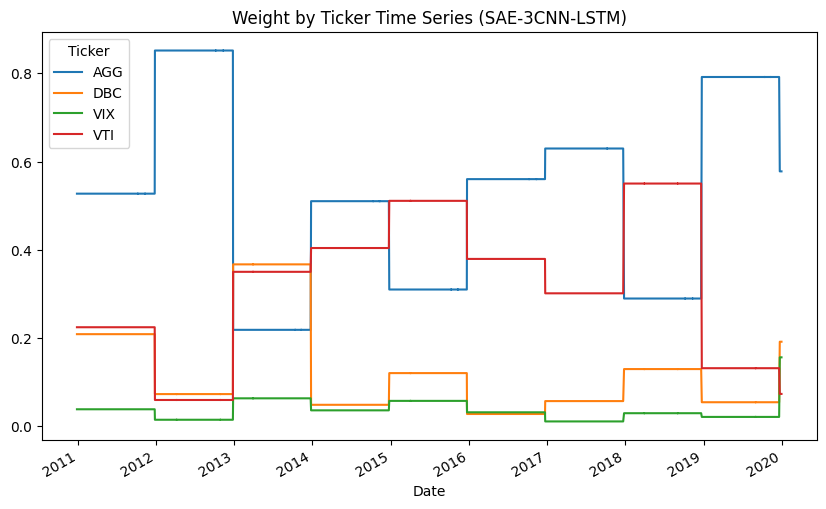

In [11]:
weight_SAE_3CNN_LSTM.pivot(index='Date', columns='Ticker', values='Weight').plot(figsize=(10, 6))
plt.title('Weight by Ticker Time Series (SAE-3CNN-LSTM)');

## Double LSTM

In [9]:
%%time

tf.keras.utils.set_random_seed(100)
weight_DOUBLE_LSTM = portfolio_paper.optimize("LSTM", 
                                              loss = "convex", 
                                              structure_change = "DOUBLE_LSTM")  
weight_DOUBLE_LSTM.to_csv("portfolio_weights/weight_annual_doubleLSTM.csv", index=False)

1/1 [==============================] - 0s 209ms/step
successfully optimized portfolio weights
CPU times: total: 5.33 s
Wall time: 16.4 s


# Monthly Rebalance

## Traditional Methods

In [10]:
# weight_minVar_monthly = portfolio_paper.optimize("variance", rebalance_frequency = 21)
weight_sharpe_monthly = portfolio_paper.optimize("sharpe", rebalance_frequency = 21)
# weight_DR_monthly = portfolio_paper.optimize("divers_ratio", rebalance_frequency = 21)
# weight_MRC_monthly = portfolio_paper.optimize("marginal_risk_contribution", rebalance_frequency = 21)

# weight_minVar_monthly.to_csv("portfolio_weights/weight_monthly_minVar.csv", index=False)
weight_sharpe_monthly.to_csv("portfolio_weights/weight_monthly_maxSharpe.csv", index=False)
# weight_DR_monthly.to_csv("portfolio_weights/weight_monthly_maxDR.csv", index=False)
# weight_MRC_monthly.to_csv("portfolio_weights/weight_monthly_minMRC.csv", index=False)

successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights


## Single-Layer LSTM

In [11]:
%%time

tf.keras.utils.set_random_seed(100)
weight_LSTM_monthly = portfolio_paper.optimize("LSTM",
                                               rebalance_frequency = 21)
weight_LSTM_monthly.to_csv("portfolio_weights/weight_monthly_LSTM.csv", index=False)

1/1 [==============================] - 0s 199ms/step
successfully optimized portfolio weights
CPU times: total: 1min 4s
Wall time: 3min 15s


## Single-Layer LSTM w/ Convex Loss

In [12]:
%%time

tf.keras.utils.set_random_seed(100)
weight_LSTM_convex_monthly = portfolio_paper.optimize("LSTM",
                                                       loss = "convex", 
                                                       rebalance_frequency = 21
                                                      )
weight_LSTM_convex_monthly.to_csv("portfolio_weights/weight_monthly_LSTM_convex.csv", index=False)

1/1 [==============================] - 0s 238ms/step
successfully optimized portfolio weights
CPU times: total: 42.6 s
Wall time: 3min 49s


## SAE-CNN-LSTM

In [13]:
%%time

tf.keras.utils.set_random_seed(100)
weight_SAE_CNN_LSTM_monthly = portfolio_paper.optimize("LSTM",
                                                       loss = "convex", 
                                                       structure_change = "SAE_CNN_LSTM",
                                                       rebalance_frequency = 21
                                                      )
weight_SAE_CNN_LSTM_monthly.to_csv("portfolio_weights/weight_monthly_saeCNNlstm.csv", index=False)

1/1 [==============================] - 0s 279ms/step
successfully optimized portfolio weights
CPU times: total: 54.7 s
Wall time: 4min 38s


In [14]:
%%time

tf.keras.utils.set_random_seed(100)
weight_SAE_3CNN_LSTM_monthly = portfolio_paper.optimize("LSTM",
                                                       loss = "convex", 
                                                       structure_change = "SAE_3CNN_LSTM",
                                                       rebalance_frequency = 21
                                                      )
weight_SAE_3CNN_LSTM_monthly.to_csv("portfolio_weights/weight_monthly_sae3CNNlstm.csv", index=False)

1/1 [==============================] - 0s 289ms/step
successfully optimized portfolio weights
CPU times: total: 53.2 s
Wall time: 5min 3s


## Double LSTM

In [15]:
%%time

tf.keras.utils.set_random_seed(100)
weight_double_LSTM_monthly = portfolio_paper.optimize("LSTM",
                                                       loss = "convex", 
                                                       structure_change = "DOUBLE_LSTM",
                                                       rebalance_frequency = 21
                                                      )
weight_double_LSTM_monthly.to_csv("portfolio_weights/weight_monthly_doubleLSTM.csv", index=False)

1/1 [==============================] - 0s 254ms/step
successfully optimized portfolio weights
CPU times: total: 45.6 s
Wall time: 3min 53s
